In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input/oral-cancer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/oral-cancer/README.dataset.txt
/kaggle/input/oral-cancer/README.roboflow.txt
/kaggle/input/oral-cancer/data.yaml
/kaggle/input/oral-cancer/valid/labels/suspicious-0029_jpg.rf.e6d4f1eaafd4e1cc658c1a6e7c96cbda.txt
/kaggle/input/oral-cancer/valid/labels/31_jpg.rf.be30d61ea37034220ca6c915c546fd64.txt
/kaggle/input/oral-cancer/valid/labels/004450_00_png.rf.7d7e5891cfed34140200e49b206d0b80.txt
/kaggle/input/oral-cancer/valid/labels/20220530_006139_00_png.rf.2bba1647bd9ecfb1de1d6c8293f5014f.txt
/kaggle/input/oral-cancer/valid/labels/296_jpg.rf.14b3f426e165d1d1cb6313be3aa43874.txt
/kaggle/input/oral-cancer/valid/labels/001256_00_png.rf.7688942f1daaba2bcdfe0b2c7517b7fe.txt
/kaggle/input/oral-cancer/valid/labels/001240_00_png.rf.f8fd7143c21a24093a336991e5e8041d.txt
/kaggle/input/oral-cancer/valid/labels/suspicious-0025_jpg.rf.e95cf756bfa7d7397479f9c08e106c66.txt
/kaggle/input/oral-cancer/valid/labels/000573_00_png.rf.a0369172d6bd78f87fefcdec5915add3.txt
/kaggle/input/oral-cancer/va

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 25.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [1]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml, train_images_dir, train_labels_dir, val_images_dir, val_labels_dir):
    # Read classes.txt
    if not os.path.exists(path_to_classes_txt):
        print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
        return

    with open(path_to_classes_txt, 'r') as f:
        classes = [line.strip() for line in f.readlines() if line.strip()]

    # Create data dictionary
    data = {
        'path': '/kaggle/input/oral-cancer',
        'train': train_images_dir,
        'val': val_images_dir,
        'nc': len(classes),
        'names': classes
    }

    # Write data to YAML file
    with open(path_to_data_yaml, 'w') as f:
        yaml.dump(data, f, sort_keys=False)
    print(f'Created config file at {path_to_data_yaml}')

# Define paths
path_to_classes_txt = '/kaggle/input/classes-oral-txt/classes_oral.txt'
path_to_data_yaml = '/kaggle/working/data.yaml'
train_images_dir = '/kaggle/input/oral-cancer/train/images'
train_labels_dir = '/kaggle/input/oral-cancer/train/labels'  # Note: changed from labelTxt to labels
val_images_dir = '/kaggle/input/oral-cancer/valid/images'
val_labels_dir = '/kaggle/input/oral-cancer/valid/labels'

create_data_yaml(path_to_classes_txt, path_to_data_yaml, train_images_dir, train_labels_dir, val_images_dir, val_labels_dir)

Created config file at /kaggle/working/data.yaml


In [5]:
!yolo detect train data=/kaggle/working/data.yaml model=yolo11n.pt epochs=30 imgsz=512

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|███████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 106MB/s]
Ultralytics 8.3.115 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropo

In [6]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/kaggle/input/oral-cancer/valid/images save=True

Ultralytics 8.3.115 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/970 /kaggle/input/oral-cancer/valid/images/000001_00_png.rf.caccea973897a8da718c7039dc5b1aa6.jpg: 512x512 (no detections), 10.7ms
image 2/970 /kaggle/input/oral-cancer/valid/images/000007_00_png.rf.55662f5258026cb8396f9cdedfff943c.jpg: 512x512 (no detections), 8.0ms
image 3/970 /kaggle/input/oral-cancer/valid/images/000061_00_png.rf.d1b08edb95830c6a6a27bc9efce406b6.jpg: 512x512 (no detections), 8.0ms
image 4/970 /kaggle/input/oral-cancer/valid/images/000107_00_png.rf.e64c5286e03a9044dae68b3611ba4a4c.jpg: 512x512 (no detections), 7.4ms
image 5/970 /kaggle/input/oral-cancer/valid/images/000145_00_png.rf.82b0cb3839ecbb77966a7e8bc73707ed.jpg: 512x512 (no detections), 7.5ms
image 6/970 /kaggle/input/oral-cancer/valid/images/000211_00_png.rf.e8be1a571e753d3ed173b24c41f413dc.jpg: 512x512 (no detections), 7.5m

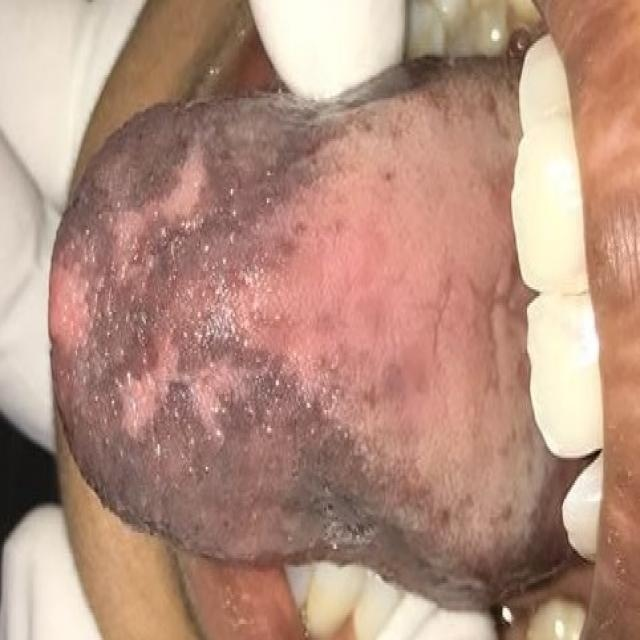

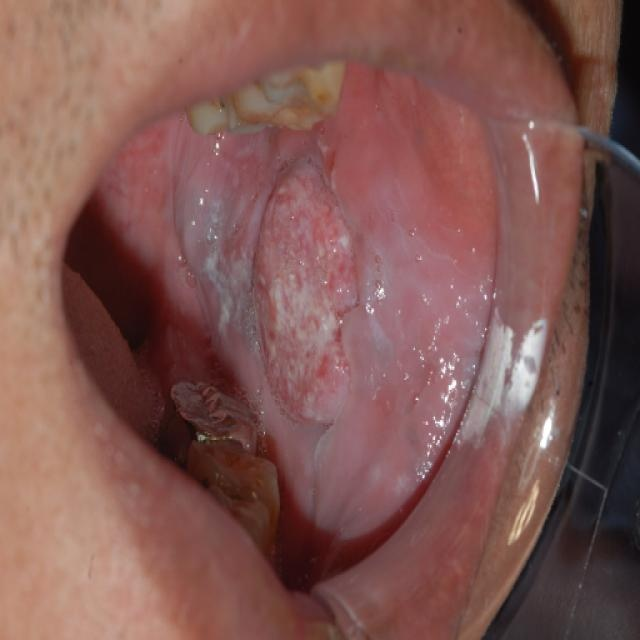

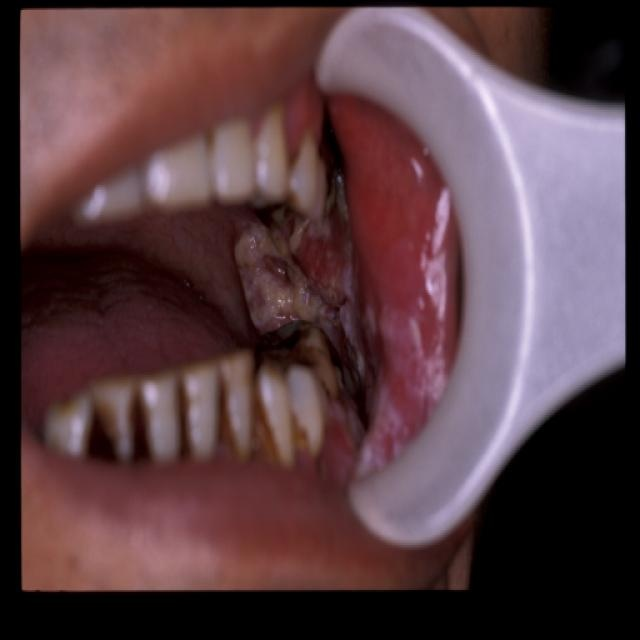

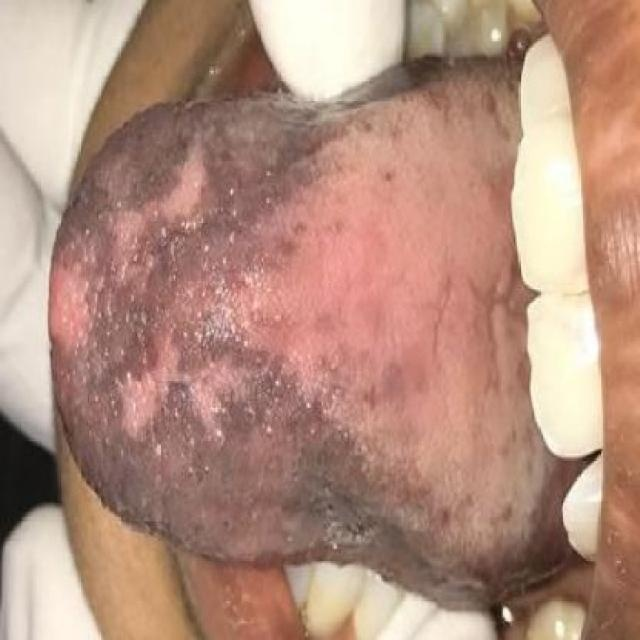

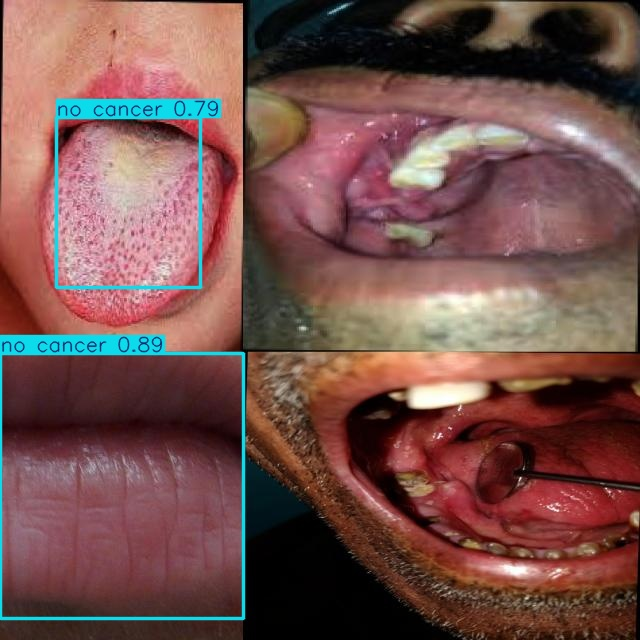

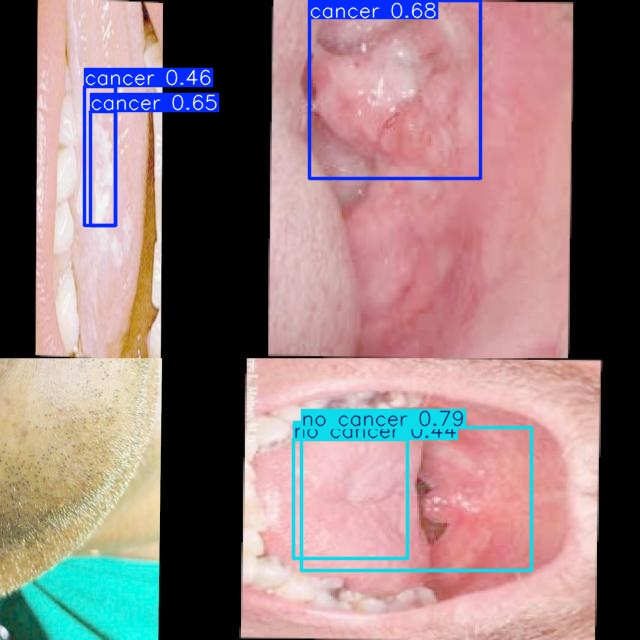

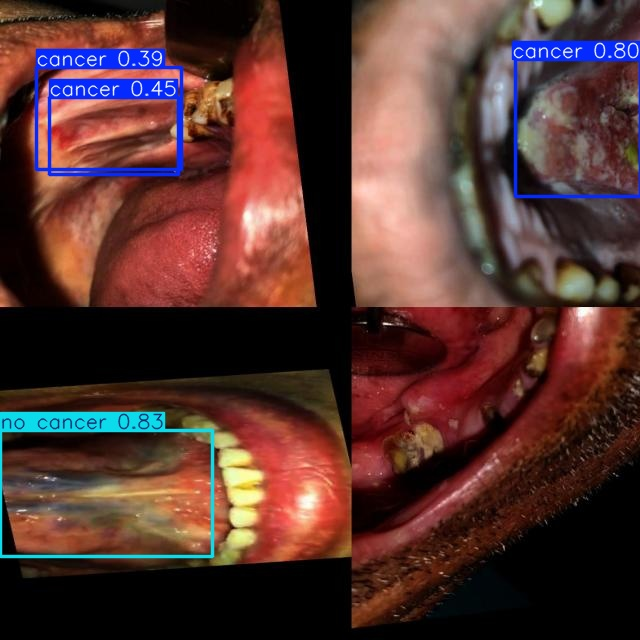

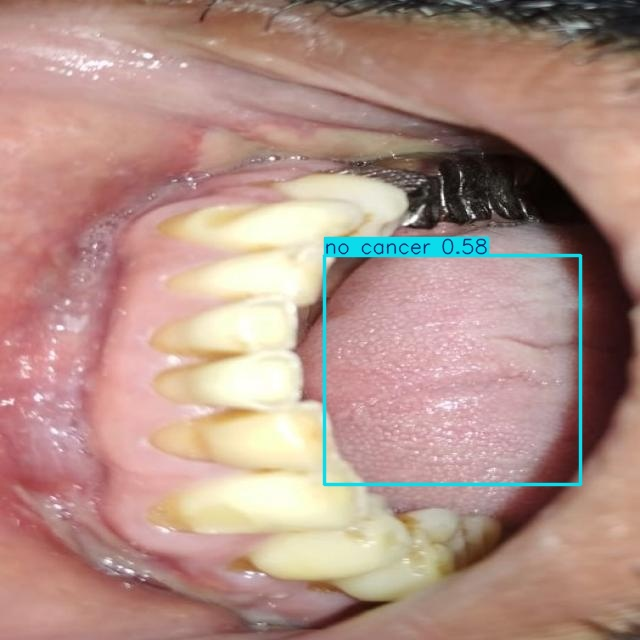

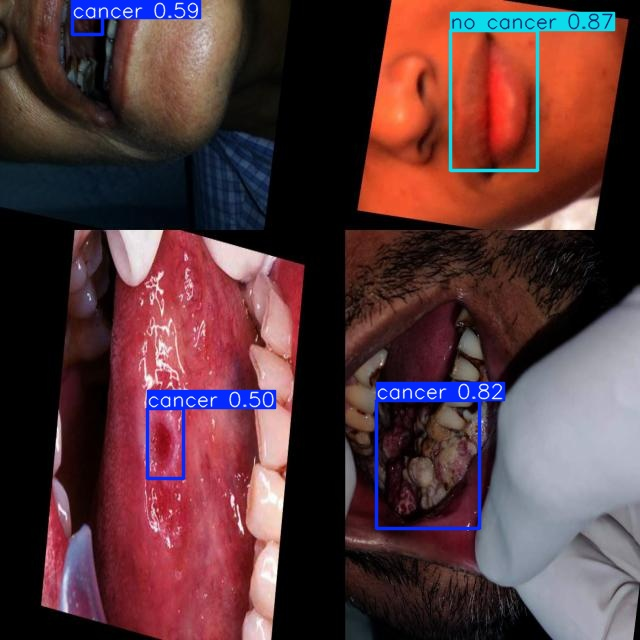

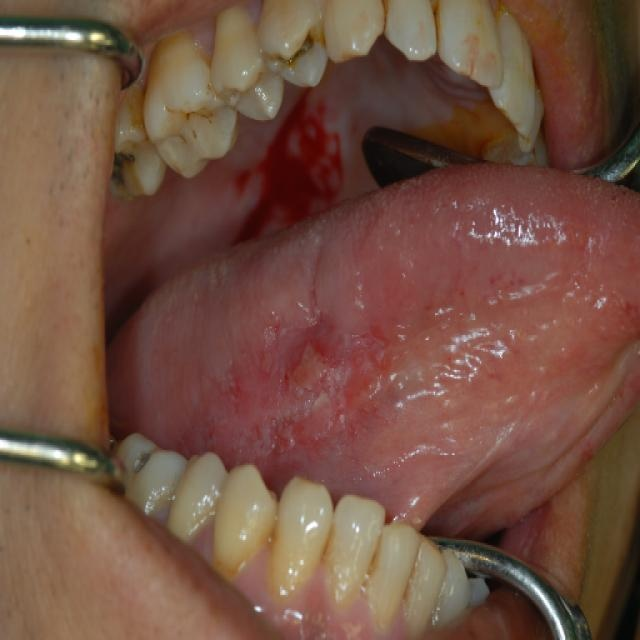

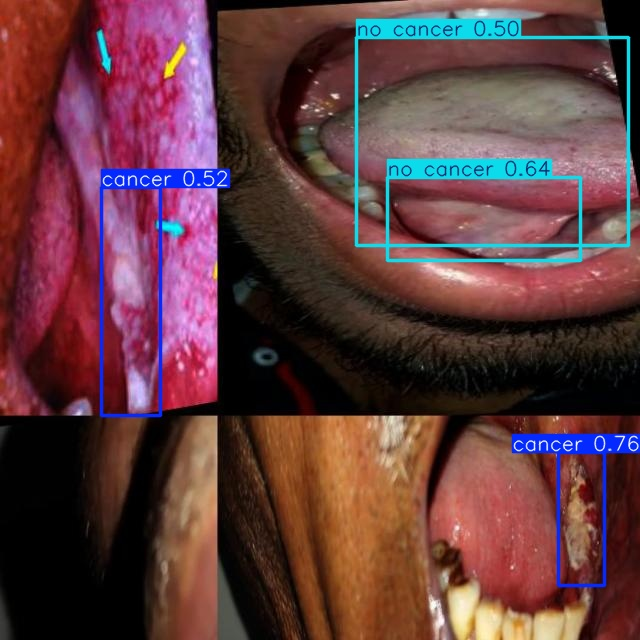

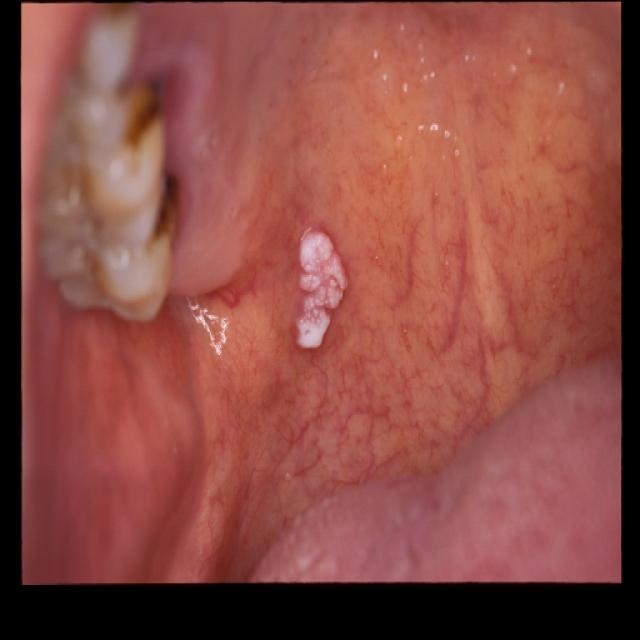

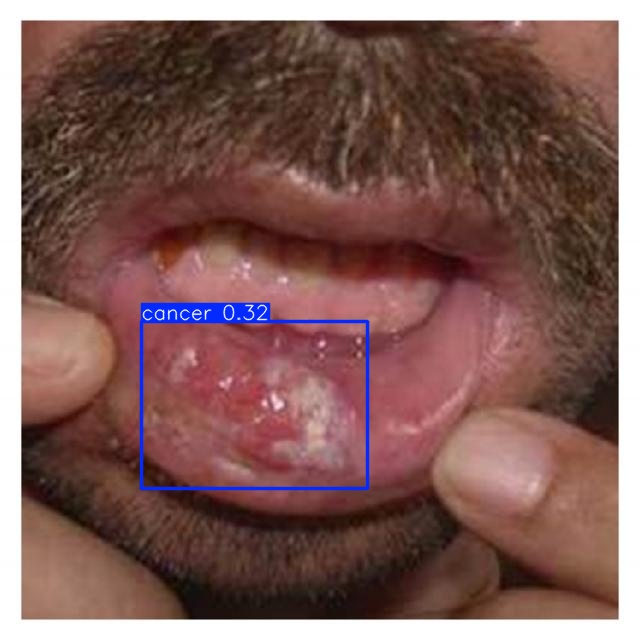

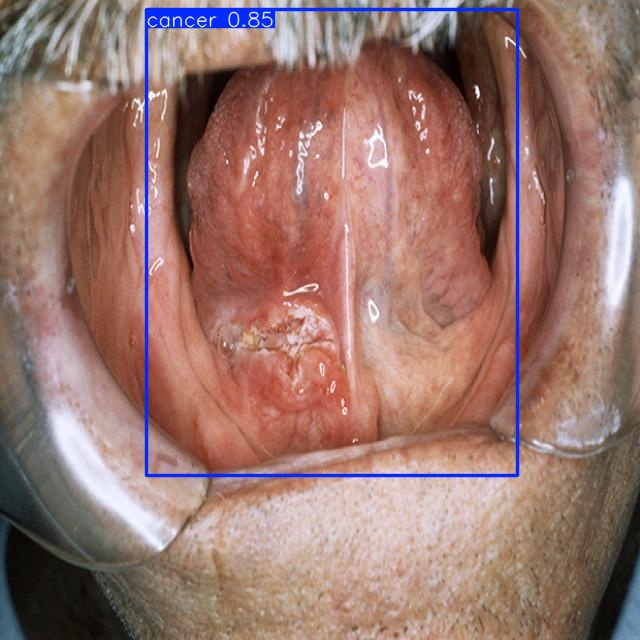

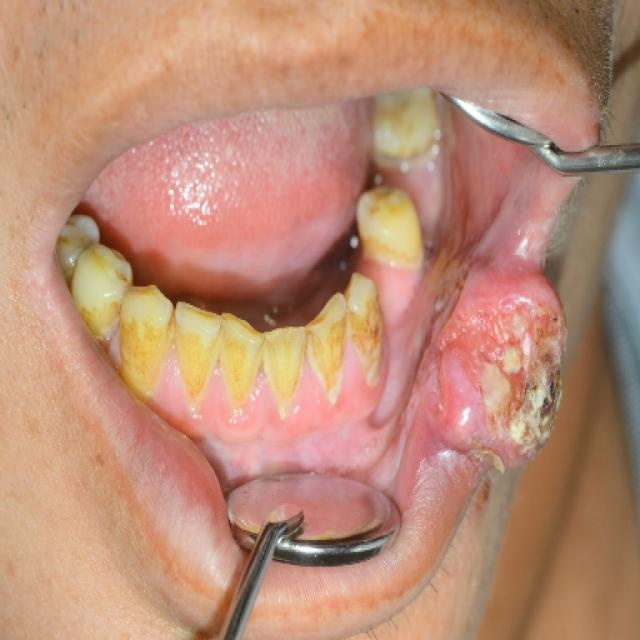

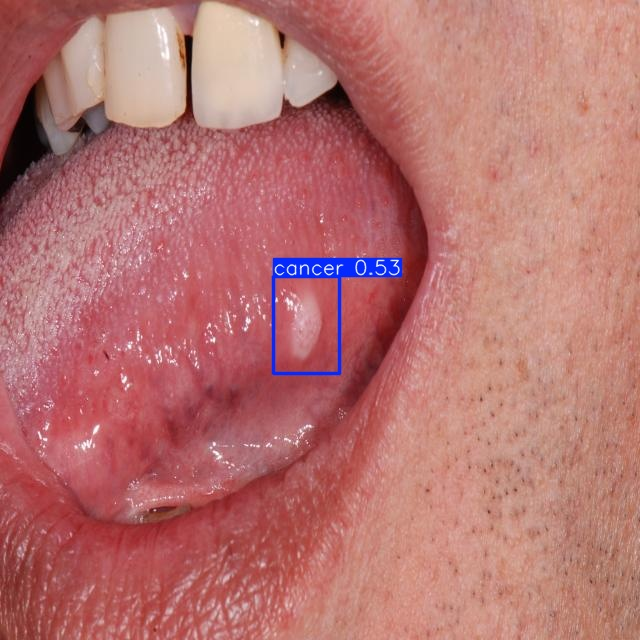

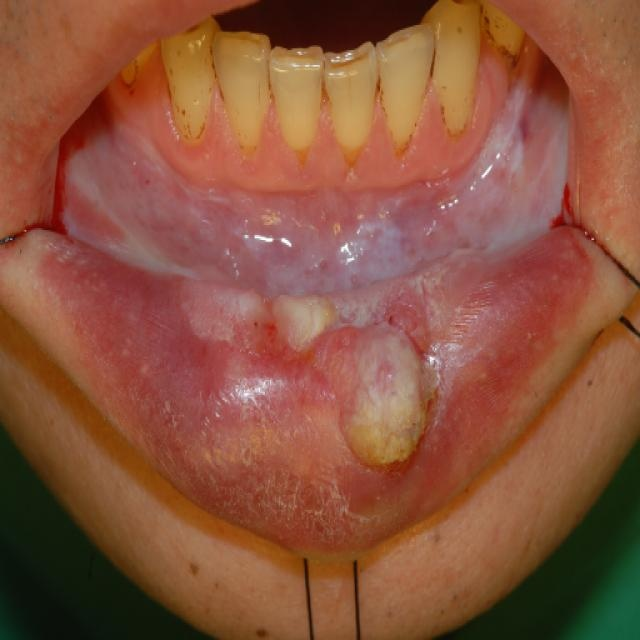

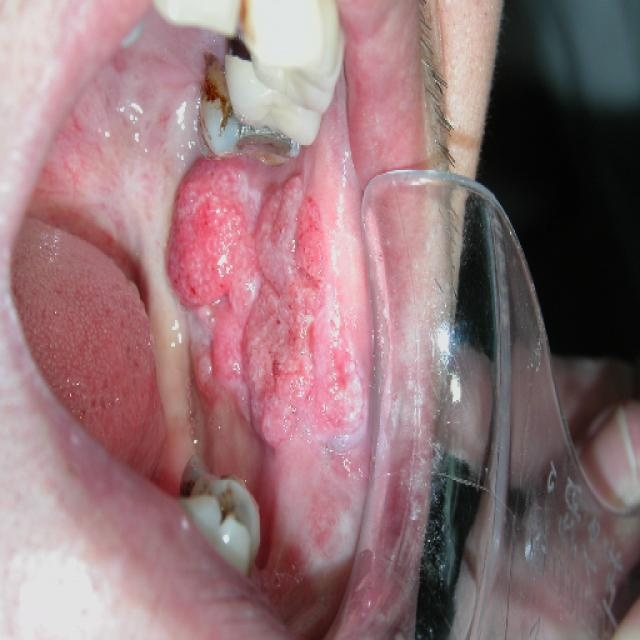

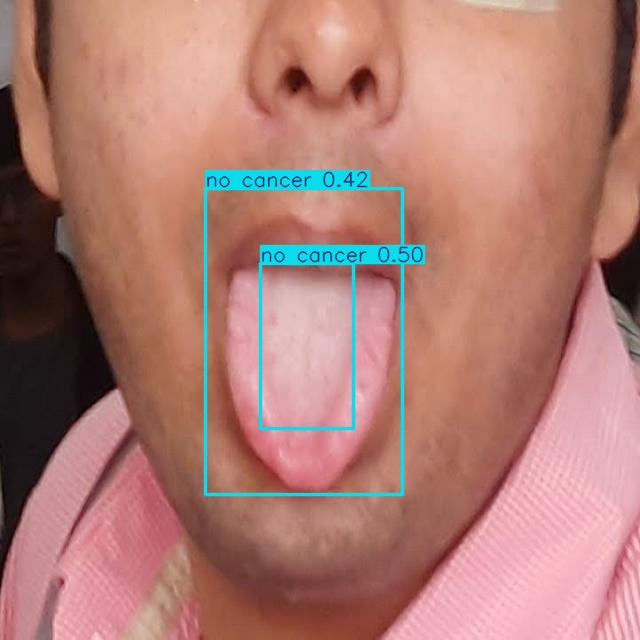

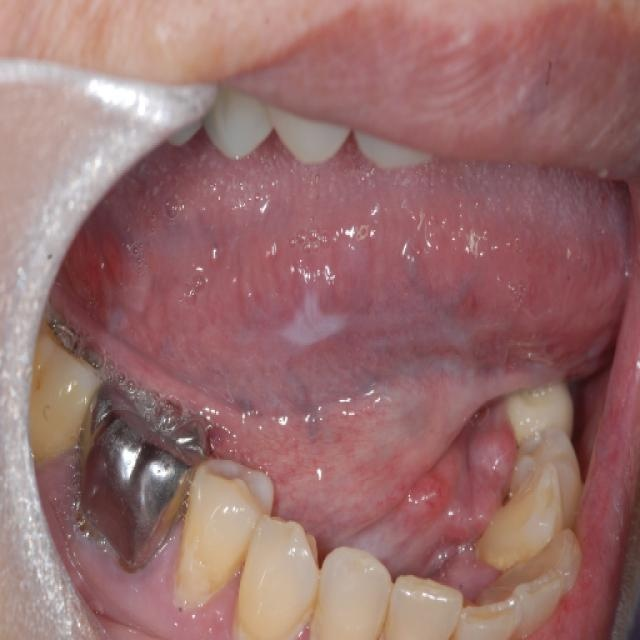

In [12]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:20]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [13]:
!mkdir My_model2
!cp runs/detect/train/weights/best.pt My_model2/my_model.pt
!cp -r runs/detect/train /my_model2

# Zip into "my_model.zip"
%cd My_model2
!zip /My_model2.zip my_model.pt
!zip -r /My_model2.zip train
%cd /kaggle

/kaggle/working/My_model2
  adding: my_model.pt (deflated 10%)
	zip warning: name not matched: train

zip error: Nothing to do! (try: zip -r /My_model2.zip . -i train)
/kaggle


In [14]:
!ls /kaggle/working/My_model2
!zip -r /kaggle/working/My_model2.zip /kaggle/working/My_model2/*
!zip -r /kaggle/working/My_model2.zip /kaggle/working/My_model2

my_model.pt
  adding: kaggle/working/My_model2/my_model.pt (deflated 10%)
updating: kaggle/working/My_model2/my_model.pt (deflated 10%)
  adding: kaggle/working/My_model2/ (stored 0%)


In [22]:
!unzip -l /kaggle/working/My_model2.zip

Archive:  /kaggle/working/My_model2.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  5449427  2025-04-23 21:43   kaggle/working/My_model2/my_model.pt
        0  2025-04-23 21:43   kaggle/working/My_model2/
---------                     -------
  5449427                     2 files


In [32]:
#!cd /kaggle/working
!ls /kaggle/working

data.yaml  My_model2  My_model2.zip  runs  yolo11n.pt


In [18]:
from IPython.display import FileLink

# Create a download link for the zip file
FileLink('/kaggle/working/My_model2.zip')

/kaggle/working/My_model2.zip